In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Splitting Dataset

```[0 1 2 3 4 5 6 7 8 9] ``` => semua data digunakan untuk training model ML

Effect :
- model ML _overfitting_ terhadap dataset yang dimiliki
- model ML _underfitting_ terhadap data baru

<hr>

- Best Practice :

    Dataset ```[0 1 2 3 4 5 6 7 8 9] ```
    
        Split dataset:
        - 75% untuk training
        - 25% untuk xtesting

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataBoston = load_boston()

In [4]:
dfBoston = pd.DataFrame(
    dataBoston['data'],
    columns = dataBoston['feature_names']
)
dfBoston['PRICE'] = dataBoston['target']
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr>

### Splitting Manually : 80% Training, 20% testing

In [5]:
dfA = dfBoston.copy()

In [6]:
round(0.8 * 506), round(0.2 * 506)

(405, 101)

In [7]:
dfAtrain = dfA[:405]
dfAtes = dfA[405:]

In [8]:
dfAtrain.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
400,25.04610,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
401,14.23620,0.0,18.1,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,7.2
402,9.59571,0.0,18.1,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31,12.1
403,24.80170,0.0,18.1,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
404,41.52920,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5


Cara menentukan persentase training dan testing
ga ada patokan tapi pada dasarnya trainingnya minimal 75%, testing maksimla 25%

Model 1 : Linear Regression
- train : dfA, features:['RM', 'LSTAT'], target : ['PRICE']
- test : dfAtest, features:['RM', 'LSTAT'], target : ['PRICE']

Model 2 : Linear Regression
- train : dfAtrain, features:['RM', 'LSTAT'], target : ['PRICE']
- test : dfAtest, features:['RM', 'LSTAT'], target : ['PRICE']


In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
model1 = LinearRegression()
model1.fit(dfA[['RM','LSTAT']],dfA['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model2 = LinearRegression()
model2.fit(dfAtrain[['RM','LSTAT']],dfAtrain['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(model1.coef_, model1.intercept_)
print(model2.coef_, model2.intercept_)

[ 5.09478798 -0.64235833] -1.3582728118744818
[ 6.28559228 -0.52915375] -9.628402588875087


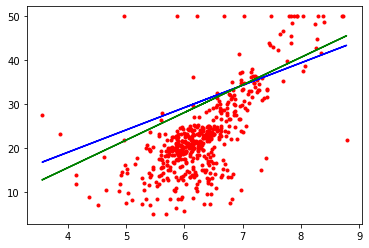

In [17]:
plt.plot(dfA['RM'],dfA['PRICE'], 'r.')
plt.plot(dfA['RM'],model1.coef_[0]*dfA['RM'] + model1.intercept_, 'b-')
plt.plot(dfA['RM'],model2.coef_[0]*dfA['RM'] + model2.intercept_, 'g-')

In [19]:
model2.score(dfAtes[['RM','LSTAT']],dfAtes['PRICE'])
# jelek karena negative

-0.37691788943237325

In [21]:
model1.score(dfAtes[['RM','LSTAT']], dfAtes['PRICE'])

-0.07915180662951937

<hr>

### 2. Splitting w/ Sklearn (80% Training, 20% Testing)

In [22]:
dfB = dfBoston.copy()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#method ini return 4 vars : xtrain 80%, xtest 20%, ytrain 80%, ytest 20%
xtrain,xtest,ytrain,ytest = train_test_split(dfB[['RM','LSTAT']], dfB['PRICE'], train_size=.8)

In [28]:
display(xtrain.iloc[0])
display(ytrain.iloc[0])
display(ytrain.index[0])

RM       6.108
LSTAT    6.570
Name: 254, dtype: float64

21.9

254

In [29]:
modelB = LinearRegression()
modelB.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
modelB.score(xtrain,ytrain)

0.6357047217929508

In [31]:
modelB.score(xtest,ytest)

0.6331595951105811

<hr>

### Effect Salah Splitting

In [40]:
dfC= dfBoston.copy()

In [43]:
dfCtrain = dfC[:2]
dfCtes = dfC[2:]
modelC = LinearRegression()
modelC.fit(dfCtrain[['RM','LSTAT']],dfCtrain['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

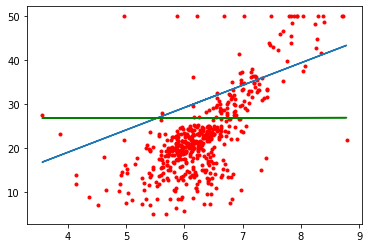

In [44]:
plt.plot(dfC['RM'], dfC['PRICE'],'r.')
plt.plot(dfA['RM'], model1.coef_[0] * dfA['RM'] + model1.intercept_)
plt.plot(dfC['RM'], modelC.coef_[0] * dfC['RM'] + modelC.intercept_, 'g-')
plt.show()

<hr>

### Exercise : Fetch California Housing

In [45]:
from sklearn.datasets import fetch_california_housing

In [47]:
datacali = fetch_california_housing()

In [48]:
dfcali = pd.DataFrame (
    datacali['data'],
    columns = datacali['feature_names']
)
dfcali['PRICE'] = datacali['target']
dfcali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
dfcali.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


'MedInc'

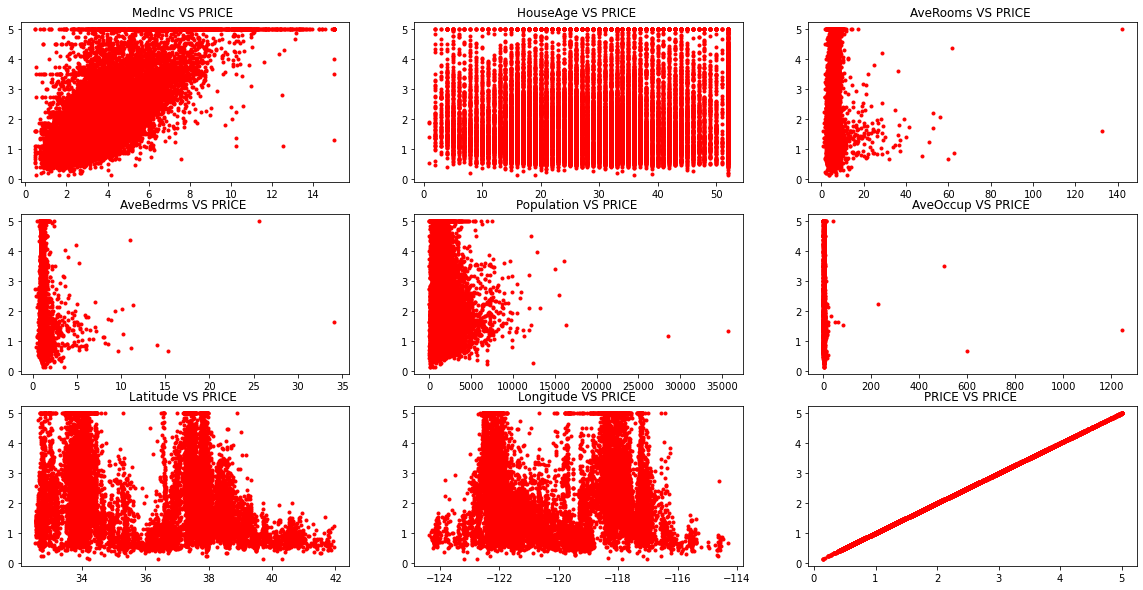

In [56]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(dfcali[dfcali.columns[i]],dfcali['PRICE'],'r.')
    plt.title(dfcali.columns[i] + ' VS PRICE ')
plt.show()